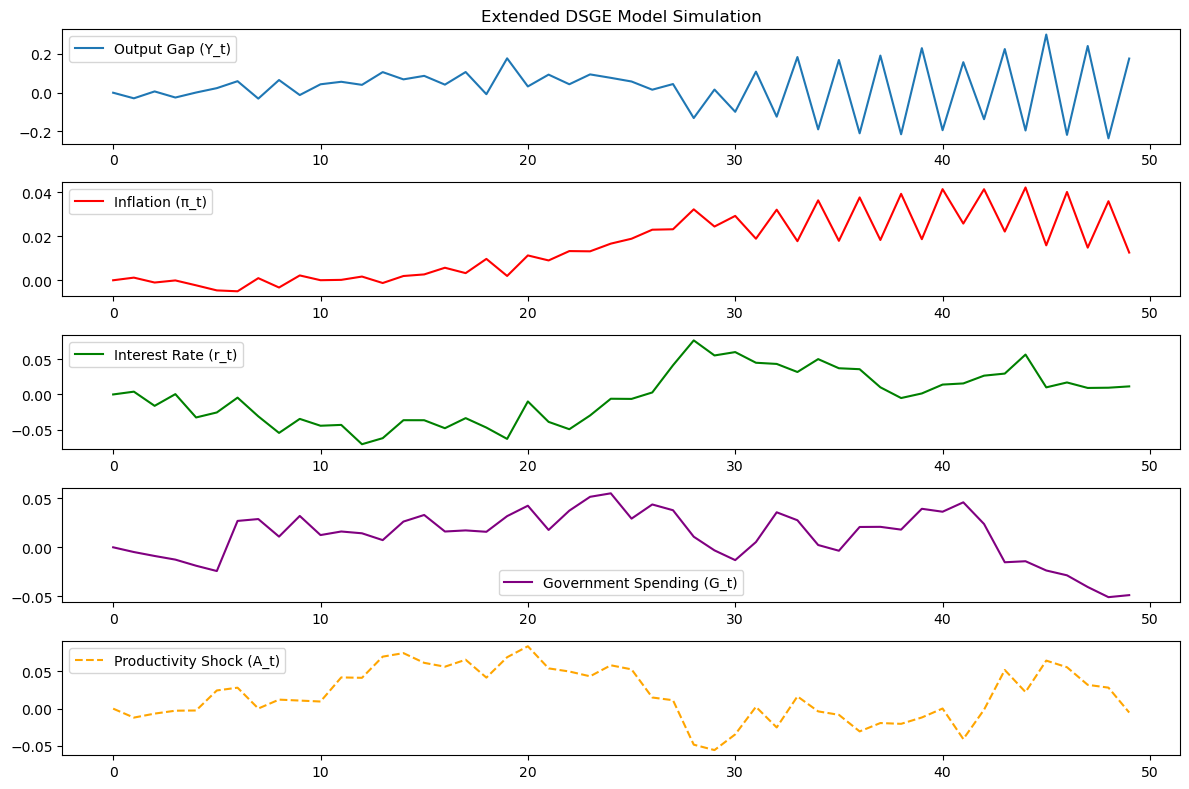

In [32]:
import numpy as np
import matplotlib.pyplot as plt

#Parameters
beta = 0.99    #Discount factor
kappa = 0.1    #Phillips curve slope
phi_pi = 1.5   #Taylor rule inflation response
phi_y = 0.5    #Taylor rule output response
rho = 0.8      #Interest rate smoothing
rho_g = 0.7    #Persistence of government spending shock
rho_a = 0.85   #Persistence of productivity shock
sigma_g = 0.02 #Std dev of government spending shock
sigma_a = 0.02 #Std dev of productivity shock
sigma_r = 0.02 #Std dev of monetary policy shock
T = 50         #Time periods

#Initialize variables
Y = np.zeros(T)      #Output
Pi = np.zeros(T)     #Inflation
R = np.zeros(T)      #Interest rate
G = np.zeros(T)      #Government spending
A = np.zeros(T)      #Productivity
shock_g = np.random.normal(0, sigma_g, T)  #Government spending shocks
shock_a = np.random.normal(0, sigma_a, T)  #Productivity shocks
shock_r = np.random.normal(0, sigma_r, T)  #Monetary policy shocks

#Simulate the DSGE system
for t in range(1, T):
    G[t] = rho_g * G[t-1] + shock_g[t]  #Government spending shock
    A[t] = rho_a * A[t-1] + shock_a[t]  #Productivity shock
    Pi[t] = beta * Pi[t-1] + kappa * (Y[t-1] - A[t])  #Phillips curve
    R[t] = rho * R[t-1] + (1-rho) * (phi_pi * Pi[t] + phi_y * Y[t]) + shock_r[t]  #Taylor rule
    Y[t] = G[t] + A[t] - (1 / kappa) * (Pi[t] - beta * Pi[t-1])  #IS curve with fiscal & productivity

#Plot 
plt.figure(figsize=(12, 8))

plt.subplot(5,1,1)
plt.plot(Y, label="Output Gap (Y_t)")
plt.title("Extended DSGE Model Simulation")
plt.legend()

plt.subplot(5,1,2)
plt.plot(Pi, label="Inflation (π_t)", color="red")
plt.legend()

plt.subplot(5,1,3)
plt.plot(R, label="Interest Rate (r_t)", color="green")
plt.legend()

plt.subplot(5,1,4)
plt.plot(G, label="Government Spending (G_t)", color="purple")
plt.legend()

plt.subplot(5,1,5)
plt.plot(A, label="Productivity Shock (A_t)", color="orange", linestyle="dashed")
plt.legend()

plt.tight_layout()
plt.show()

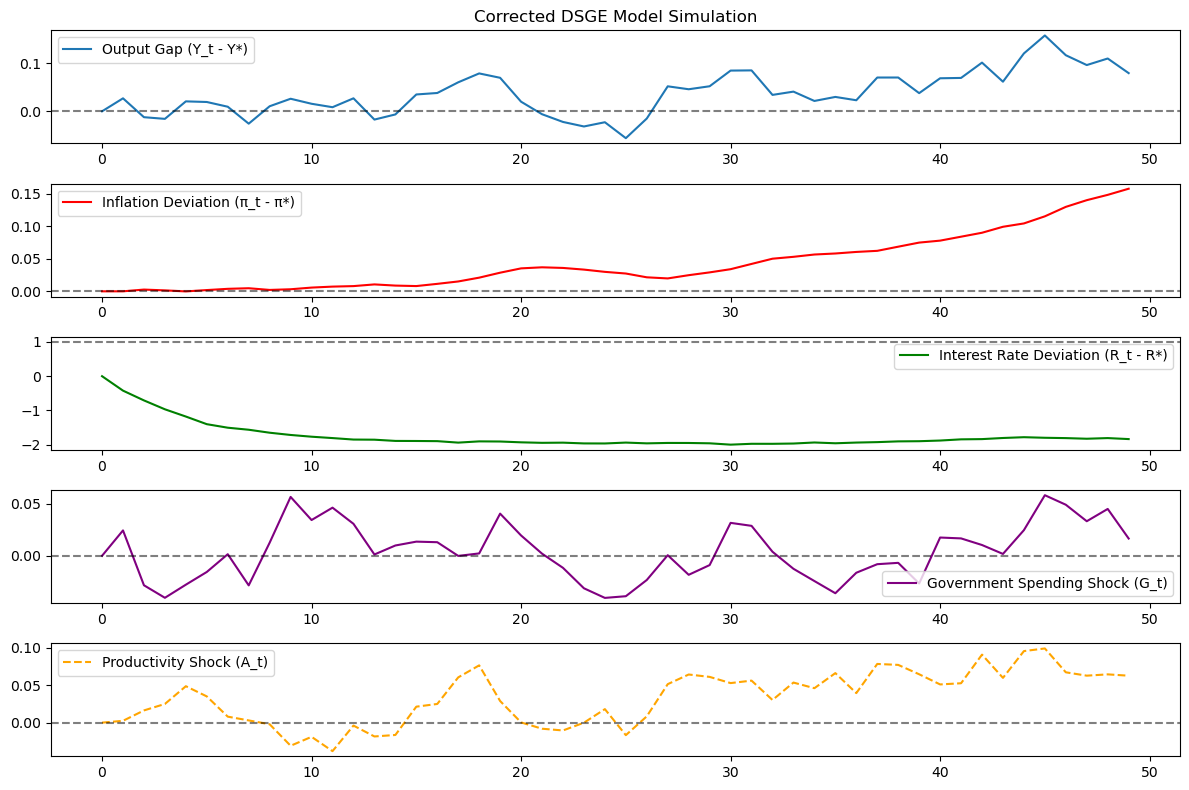

In [36]:
import numpy as np
import matplotlib.pyplot as plt

#Parameters
beta = 0.99    #Discount factor
kappa = 0.1    #Phillips curve slope
phi_pi = 1.5   #Taylor rule inflation response
phi_y = 0.5    #Taylor rule output response
rho = 0.8      #Interest rate smoothing
rho_g = 0.7    #Persistence of government spending shock
rho_a = 0.85   #Persistence of productivity shock
sigma_g = 0.02 #Std dev of government spending shock
sigma_a = 0.02 #Std dev of productivity shock
sigma_r = 0.02 #Std dev of monetary policy shock
Y_star = 1.0   #Steady-state output
Pi_star = 2.0  #Steady-state inflation
R_star = 1.0   #Steady-state interest rate
T = 50         #Time periods

#Initialize variables
Y = np.zeros(T)      #Output gap (deviation from Y_star)
Pi = np.zeros(T)     #Inflation (deviation from Pi_star)
R = np.zeros(T)      #Interest rate (deviation from R_star)
G = np.zeros(T)      #Government spending shock
A = np.zeros(T)      #Productivity shock
shock_g = np.random.normal(0, sigma_g, T)  #Government spending shocks
shock_a = np.random.normal(0, sigma_a, T)  #Productivity shocks
shock_r = np.random.normal(0, sigma_r, T)  #Monetary policy shocks

#Simulate the DSGE system
for t in range(1, T):
    G[t] = rho_g * G[t-1] + shock_g[t]  #Government spending shock
    A[t] = rho_a * A[t-1] + shock_a[t]  #Productivity shock
    
    #New Keynesian Phillips Curve (Backward-looking version)
    Pi[t] = beta * Pi[t-1] + kappa * Y[t-1]  #Inflation dynamics

    #Taylor Rule (Deviation from steady state)
    R[t] = R_star + rho * (R[t-1] - R_star) + (1 - rho) * (phi_pi * (Pi[t] - Pi_star) + phi_y * Y[t]) + shock_r[t]

    #IS Curve with expectations approximated by past values
    Y[t] = (Y[t-1] - (1/kappa) * (Pi[t] - beta * Pi[t-1]) + G[t] + A[t])  

#Plot results
plt.figure(figsize=(12, 8))

plt.subplot(5, 1, 1)
plt.plot(Y, label="Output Gap (Y_t - Y*)")
plt.axhline(0, linestyle="dashed", color="black", alpha=0.5)
plt.title("Corrected DSGE Model Simulation")
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(Pi, label="Inflation Deviation (π_t - π*)", color="red")
plt.axhline(0, linestyle="dashed", color="black", alpha=0.5)
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(R, label="Interest Rate Deviation (R_t - R*)", color="green")
plt.axhline(R_star, linestyle="dashed", color="black", alpha=0.5)
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(G, label="Government Spending Shock (G_t)", color="purple")
plt.axhline(0, linestyle="dashed", color="black", alpha=0.5)
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(A, label="Productivity Shock (A_t)", color="orange", linestyle="dashed")
plt.axhline(0, linestyle="dashed", color="black", alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()